In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
rent_prices_path = "ZORI_rentals.csv"
rent_prices_df = pd.read_csv(rent_prices_path)

# Set the index of home_sales_df to 'StateName'
rent_prices_df = rent_prices_df.set_index('StateName')

# Display the data table for preview
rent_prices_df.head()

,RegionID,SizeRank,RegionName,RegionType,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,...,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31
StateName,,,,,,,,,,,,,,,,,,,,,
NaN,102001,0,United States,country,1230.015131,1236.700014,1245.754168,1255.592385,1265.248688,1273.627128,...,1950.773152,1961.957243,1968.929946,1972.033447,1969.910642,1965.063481,1961.578611,1963.898021,1971.370300,1982.677025
NY,394913,1,"New York, NY",msa,2296.675564,2312.141618,2329.987051,2352.099880,2367.899093,2385.433714,...,3176.921518,3201.358885,3210.819663,3209.919221,3193.448153,3170.689767,3152.301502,3156.339043,3174.198012,3205.572269
CA,753899,2,"Los Angeles, CA",msa,1843.245303,1855.882911,1871.189970,1884.575836,1899.021493,1910.733050,...,2887.645831,2902.366617,2915.134679,2918.774513,2914.996744,2902.455419,2892.708612,2895.963930,2906.877789,2924.553382
IL,394463,3,"Chicago, IL",msa,1441.363016,1448.970716,1459.833341,1469.774876,1480.919628,1489.693836,...,1991.738124,2005.048535,2012.419066,2009.776288,2002.083981,1993.872517,1997.331169,2008.975251,2023.998489,2038.100922
TX,394514,4,"Dallas, TX",msa,1107.508458,1113.079930,1121.225812,1132.072875,1142.096397,1150.385801,...,1773.730378,1783.162065,1785.984970,1782.936633,1776.259449,1769.703467,1760.652852,1755.143757,1751.543479,1755.441552


In [3]:
# Selecting the desired columns
filtered_rent_df = rent_prices_df.loc[:, '2015-01-31':'2023-12-31']

# Resetting the index to keep 'StateName' as a column
filtered_rent_df.reset_index(inplace=True)

# Display the filtered rental DataFrame
filtered_rent_df.head()


,StateName,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,...,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31
0,NaN,1230.015131,1236.700014,1245.754168,1255.592385,1265.248688,1273.627128,1279.733613,1283.433076,1285.158340,...,1914.340923,1926.062012,1939.741383,1950.773152,1961.957243,1968.929946,1972.033447,1969.910642,1965.063481,1961.578611
1,NY,2296.675564,2312.141618,2329.987051,2352.099880,2367.899093,2385.433714,2396.715609,2406.559044,2409.647704,...,3070.057348,3103.766320,3142.028920,3176.921518,3201.358885,3210.819663,3209.919221,3193.448153,3170.689767,3152.301502
2,CA,1843.245303,1855.882911,1871.189970,1884.575836,1899.021493,1910.733050,1924.322365,1934.694779,1944.606518,...,2851.956795,2867.210075,2877.195545,2887.645831,2902.366617,2915.134679,2918.774513,2914.996744,2902.455419,2892.708612
3,IL,1441.363016,1448.970716,1459.833341,1469.774876,1480.919628,1489.693836,1494.705129,1496.694166,1491.418798,...,1931.171869,1948.053294,1971.057249,1991.738124,2005.048535,2012.419066,2009.776288,2002.083981,1993.872517,1997.331169
4,TX,1107.508458,1113.079930,1121.225812,1132.072875,1142.096397,1150.385801,1157.593050,1160.570019,1161.659553,...,1751.977058,1757.294725,1766.017108,1773.730378,1783.162065,1785.984970,1782.936633,1776.259449,1769.703467,1760.652852


In [4]:
# Drop rows with NaN values in the 'StateName' column
filtered_rent_df = filtered_rent_df.dropna(subset=['StateName'])

# Identify duplicate rows based on the 'StateName' column
duplicate_states_rent = filtered_rent_df[filtered_rent_df.duplicated(subset=['StateName'], keep=False)]

# Display duplicate rows
print("Duplicate Rows based on StateName column:")
duplicate_states_rent.head()


Duplicate Rows based on StateName column:


,StateName,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,...,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31
1,NY,2296.675564,2312.141618,2329.987051,2352.099880,2367.899093,2385.433714,2396.715609,2406.559044,2409.647704,...,3070.057348,3103.766320,3142.028920,3176.921518,3201.358885,3210.819663,3209.919221,3193.448153,3170.689767,3152.301502
2,CA,1843.245303,1855.882911,1871.189970,1884.575836,1899.021493,1910.733050,1924.322365,1934.694779,1944.606518,...,2851.956795,2867.210075,2877.195545,2887.645831,2902.366617,2915.134679,2918.774513,2914.996744,2902.455419,2892.708612
3,IL,1441.363016,1448.970716,1459.833341,1469.774876,1480.919628,1489.693836,1494.705129,1496.694166,1491.418798,...,1931.171869,1948.053294,1971.057249,1991.738124,2005.048535,2012.419066,2009.776288,2002.083981,1993.872517,1997.331169
4,TX,1107.508458,1113.079930,1121.225812,1132.072875,1142.096397,1150.385801,1157.593050,1160.570019,1161.659553,...,1751.977058,1757.294725,1766.017108,1773.730378,1783.162065,1785.984970,1782.936633,1776.259449,1769.703467,1760.652852
5,TX,1232.434610,1236.872826,1244.062460,1256.065055,1265.989781,1275.083491,1277.361461,1277.625028,1272.928463,...,1631.839991,1638.221695,1648.076081,1657.267080,1665.700458,1667.849721,1665.733158,1660.688351,1655.608703,1654.142480


In [5]:
# Group by 'StateName' and aggregate by taking the median across each column
combined_rent_df = duplicate_states_rent.groupby('StateName').median().reset_index()

# Display the combined rental DataFrame
combined_rent_df.head()


,StateName,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,...,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31
0,AK,1221.111162,1219.015070,1218.018008,1215.875757,1220.389102,1228.674352,1226.890154,1222.281571,1224.503003,...,1612.757159,1647.187017,1628.660084,1626.655084,1616.788621,1625.704414,1640.631322,1641.056042,1621.333717,1614.239366
1,AL,851.279507,854.692620,855.861463,860.668655,859.478309,857.169838,857.365331,858.818015,858.898855,...,1307.588337,1223.058290,1270.515002,1278.358594,1254.950130,1269.098033,1295.397924,1300.855568,1300.361763,1291.864081
2,AR,868.768230,873.237407,879.145969,882.178687,886.339808,895.324165,898.539001,899.008870,894.610058,...,1059.952989,1049.012433,1061.383179,1065.634459,1081.552582,1078.168993,1087.960613,1089.260939,1105.275622,1100.538101
3,AZ,907.002658,915.835480,921.343890,929.169966,930.871548,935.750283,938.268872,939.200472,941.539578,...,1539.265161,1545.398610,1551.237407,1551.993075,1567.679476,1583.214469,1598.893077,1618.362186,1622.723231,1586.546741
4,CA,1468.343262,1468.806079,1475.448226,1483.084577,1490.992782,1505.266208,1509.051494,1520.148115,1516.960928,...,2259.485744,2330.191008,2207.439301,2218.985607,2230.404913,2235.224317,2245.603814,2246.635263,2123.722081,2135.318467


In [6]:
# Unpivot the DataFrame to have each date as a separate row
combined_rent_df_unpivoted = pd.melt(combined_rent_df, id_vars=['StateName'], var_name='Date', value_name='MedianRentPrice')

# Convert the 'Date' column to datetime format
combined_rent_df_unpivoted['Date'] = pd.to_datetime(combined_rent_df_unpivoted['Date'])

# Extract the year from the 'Date' column
combined_rent_df_unpivoted['Year'] = combined_rent_df_unpivoted['Date'].dt.year

# Group by 'StateName' and 'Year' and aggregate the median rent prices
combined_rent_df_yearly = combined_rent_df_unpivoted.groupby(['StateName', 'Year']).median().reset_index()

# Pivot the DataFrame to have each year as a separate column
combined_rent_df_pivoted = combined_rent_df_yearly.pivot(index='StateName', columns='Year', values='MedianRentPrice').reset_index()

# Display the pivoted rental DataFrame
combined_rent_df_pivoted.head()


Year,StateName,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,AK,1221.933076,1209.780223,1195.909131,1205.135466,1218.609452,1236.470535,1370.707518,1538.753021,1623.519065
1,AL,858.858435,889.335876,949.127612,981.482886,1035.115822,1106.025440,1193.488777,1288.908626,1285.246681
2,AR,893.761270,860.599734,913.713539,922.532176,953.333942,985.753220,1048.966616,1134.278773,1079.860787
3,AZ,937.009578,984.037885,1033.593673,1197.051759,1295.411432,1364.313029,1625.614396,1563.888444,1567.744276
4,CA,1507.158851,1634.528493,1778.482175,1898.167450,1993.581360,2028.106497,2206.757640,2330.633474,2240.414065


In [7]:
# Convert each year's median rent price to numerical values
for year in combined_rent_df_pivoted.columns[1:]:
    combined_rent_df_pivoted[year] = combined_rent_df_pivoted[year].astype(str).str.replace('$', '').str.replace(',', '').astype(float)

# Display the DataFrame with median rent prices as numerical values
combined_rent_df_pivoted.head()


Year,StateName,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,AK,1221.933076,1209.780223,1195.909131,1205.135466,1218.609452,1236.470535,1370.707518,1538.753021,1623.519065
1,AL,858.858435,889.335876,949.127612,981.482886,1035.115822,1106.025440,1193.488777,1288.908626,1285.246681
2,AR,893.761270,860.599734,913.713539,922.532176,953.333942,985.753220,1048.966616,1134.278773,1079.860787
3,AZ,937.009578,984.037885,1033.593673,1197.051759,1295.411432,1364.313029,1625.614396,1563.888444,1567.744276
4,CA,1507.158851,1634.528493,1778.482175,1898.167450,1993.581360,2028.106497,2206.757640,2330.633474,2240.414065


In [8]:
# Round each year's rental price to the nearest whole number
for year in combined_rent_df_pivoted.columns[1:]:
    combined_rent_df_pivoted[year] = combined_rent_df_pivoted[year].round()

# Display the DataFrame with rounded rental prices
combined_rent_df_pivoted.head()



Year,StateName,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,AK,1222.0,1210.0,1196.0,1205.0,1219.0,1236.0,1371.0,1539.0,1624.0
1,AL,859.0,889.0,949.0,981.0,1035.0,1106.0,1193.0,1289.0,1285.0
2,AR,894.0,861.0,914.0,923.0,953.0,986.0,1049.0,1134.0,1080.0
3,AZ,937.0,984.0,1034.0,1197.0,1295.0,1364.0,1626.0,1564.0,1568.0
4,CA,1507.0,1635.0,1778.0,1898.0,1994.0,2028.0,2207.0,2331.0,2240.0


In [16]:
import os

# Check if the directory exists, if not, create it
output_dir = "output_data"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Export the Rental into a csv
combined_rent_df_pivoted.to_csv(f"{output_dir}/rentals_by_state.csv")

In [18]:
#Read Saved Data
combined_rent_df_pivoted.to_csv(f"{output_dir}/rentals_by_state.csv")

# Display sample data
combined_rent_df_pivoted.head()

Year,StateName,2015,2016,2017,2018,2019,2020,2021,2022,2023,Increase
0,AK,1222.0,1210.0,1196.0,1205.0,1219.0,1236.0,1371.0,1539.0,1624.0,402.0
1,AL,859.0,889.0,949.0,981.0,1035.0,1106.0,1193.0,1289.0,1285.0,426.0
2,AR,894.0,861.0,914.0,923.0,953.0,986.0,1049.0,1134.0,1080.0,186.0
3,AZ,937.0,984.0,1034.0,1197.0,1295.0,1364.0,1626.0,1564.0,1568.0,631.0
4,CA,1507.0,1635.0,1778.0,1898.0,1994.0,2028.0,2207.0,2331.0,2240.0,733.0


In [9]:
# Calculate the increase in rental prices from 2015 to 2023
combined_rent_df_pivoted['Increase'] = combined_rent_df_pivoted[2023] - combined_rent_df_pivoted[2015]

# Sort the StateNames based on the increase in rental prices
sorted_rent_df = combined_rent_df_pivoted.sort_values(by='Increase', ascending=False)

# Select the top 3 StateNames with the highest increase
top_3_rent_state_names = sorted_rent_df.head(3)['StateName'].tolist()

# Display the top 3 StateNames with the highest increase
print("Top 3 StateNames with the highest increase in rental prices:")
for state_name in top_3_rent_state_names:
    print(state_name)


Top 3 StateNames with the highest increase in rental prices:
FL
MA
CA


In [10]:
# Sort the StateNames based on the increase in rental prices in ascending order
sorted_rent_df_lowest = combined_rent_df_pivoted.sort_values(by='Increase', ascending=True)

# Select the bottom 3 StateNames with the lowest increase
lowest_3_rent_state_names = sorted_rent_df_lowest.head(3)['StateName'].tolist()

# Display the bottom 3 StateNames with the lowest increase
print("Bottom 3 StateNames with the lowest increase in rental prices:")
for state_name in lowest_3_rent_state_names:
    print(state_name)


Bottom 3 StateNames with the lowest increase in rental prices:
WI
ME
MN


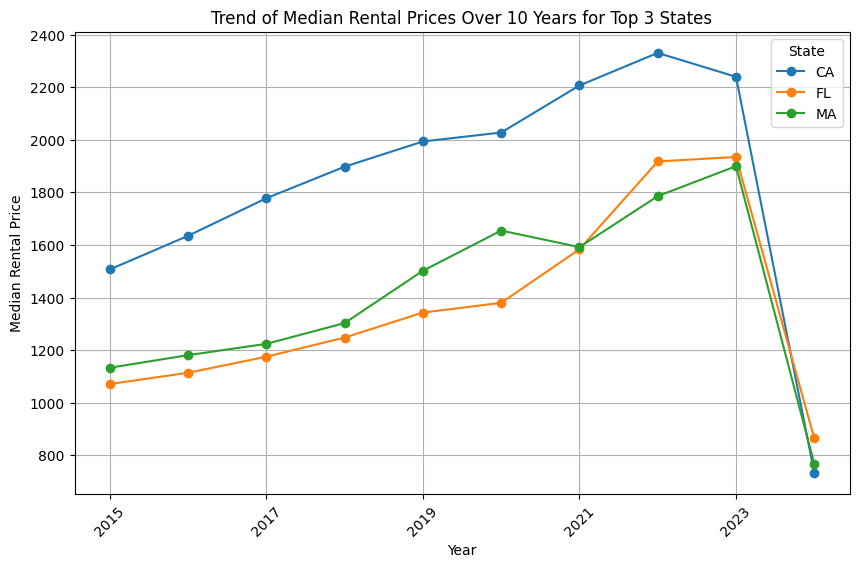

In [15]:
# Filter the DataFrame to include only the data for the top 3 states (HI, UT, CO)
top_3_rent_state_names = combined_rent_df_pivoted[combined_rent_df_pivoted['StateName'].isin(['FL', 'MA', 'CA'])]

# Set the StateName column as the index
top_3_rent_state_names.set_index('StateName', inplace=True)

# Transpose the DataFrame to have years as rows and states as columns
transposed_data = top_3_rent_state_names.transpose()

# Plot the data using a line plot
ax = transposed_data.plot(kind='line', figsize=(10, 6), marker='o')

# Set the title and labels
plt.title('Trend of Median Rental Prices Over 10 Years for Top 3 States')
plt.xlabel('Year')
plt.ylabel('Median Rental Price')

# Rotate x-axis tick labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.legend(title='State')
plt.grid(True)
plt.show()



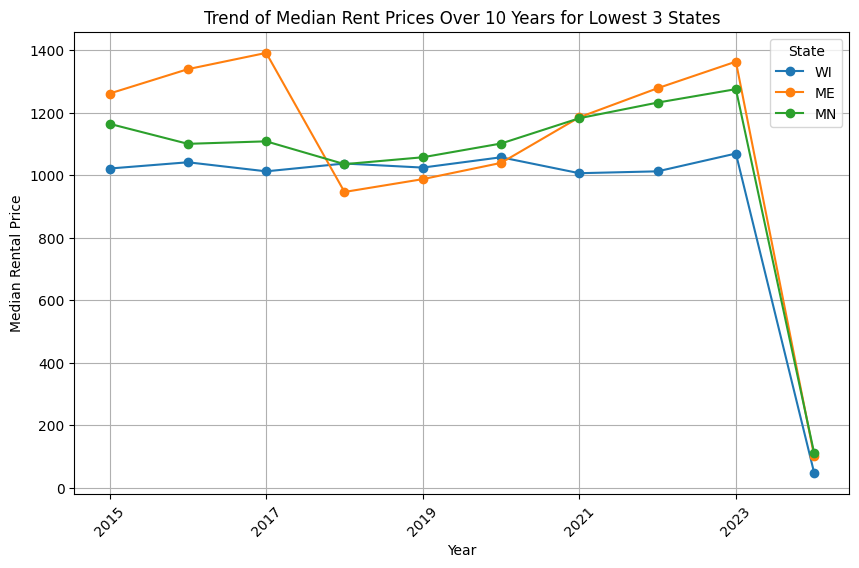

In [14]:
# Sort the DataFrame by the increase in median home prices in ascending order
sorted_rent_df_lowest = combined_rent_df_pivoted.sort_values(by='Increase', ascending=True)

# Select the lowest 3 states
lowest_3_rent_state_names = sorted_rent_df_lowest.head(3)

# Set the StateName column as the index
lowest_3_rent_state_names.set_index('StateName', inplace=True)

# Transpose the DataFrame to have years as rows and states as columns
transposed_data_lowest = lowest_3_rent_state_names.transpose()

# Plot the data using a line plot
ax = transposed_data_lowest.plot(kind='line', figsize=(10, 6), marker='o')

# Set the title and labels
plt.title('Trend of Median Rent Prices Over 10 Years for Lowest 3 States')
plt.xlabel('Year')
plt.ylabel('Median Rental Price')

# Rotate x-axis tick labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.legend(title='State')
plt.grid(True)
plt.show()